<h1 align="center"> CSE 142 Assignment 3, Winter 2024

<h2 align="center"> 4 Questions, 100 pts, due: 23:59 pm, Feb 19th, 2024

### RICHARD HSIEH 1839728

## Instruction 

- Submit your assignments onto **Gradescope** by the due date. Upload a <code>zip</code> file containing:

    (1) The saved/latest <code>.ipynb</code> file, please **rename this file with your name included**.

    (2) Also save your file into a pdf version, if error appears, save an html version instead (easy to grade for written questions).
    
    (3) All other materials to make your <code>.ipynb</code> file runnable.
    
    (4) You do not need to submit the cat_vs_dog directory due to its large size.
    
    **For assignment related questions, please reach TA or grader through Slack/Piazza/Email.**
    
- This is an **individual** assignment. All help from others (from the web, books other than text, or people other than the TA or instructor) must be clearly acknowledged. 

## Objective 

- **Task 1:** Perceptron (math)
- **Task 2:** Support Vector Machine (math)
- **Task 3:** Image Classification (with Scikit-learn)
- **Task 4:** Coding Linear Regression from scratch

# Question 1. (Perceptron, 30 pts)

## (a -- 10 pts)

On what kinds of training data does the perceptron algorithm converge?

The perceptron algorithm converges only on linear training data.

## (b -- 5*4 pts) 

Simulate one pass through the following data with the perceptron algorithm described in lecture and homework.
Use the learning rate $\eta = 1$. 

Start with $w=(0,0,0)$ and show the resulting weight vector after each example.

(Assume that the perceptron algorithm predicts incorrectly when $w \cdot x = 0$, and ignore the bias term.)

| $x_1$  | $x_2$ | $x_3$ |   $y$ |
| :--- | :--- | :--- | :--- |
| 1 | 0 | 1 |  +1|
| 0 | -1 | 1 |  -1|
| 1 | 1 | 1 | +1|
| -1 | 2 | 0 |  -1|

Initially, $w = ( 0, 0, 0)$. 

After the first example, $w = ( 1, \ 0,\ 1)$;

After the second example, $w = (1, \ 1, \ 0)$;

After the third example, $w = (1, \ 1, \ 0)$; because ya = 2 > 0

After the fourth example, $w = (2, \ -1, \ 0)$.

**Reminder:** if you are unsure about your answers, give as many details as possible so that you won't get 0 points in the wrong answers. 



# Question 2. (Support Vector Machines, 30 pts)
Suppose that we have the following training set (where the instances have two features):

| $x_1$ | $x_2$ | $y$ |
| :--- | :--- | :--- |
| 1 | 1  |  +1|
| 1 | 2  |  +1|
| 2 | 1  |  +1|
| 0 | 0  |  -1|
| 1 | 0  |  -1|
| 0 | 1  |  -1|

## (a -- 10 pts) 

Plot them (in hand or with python) and find the support vectors (by eye).


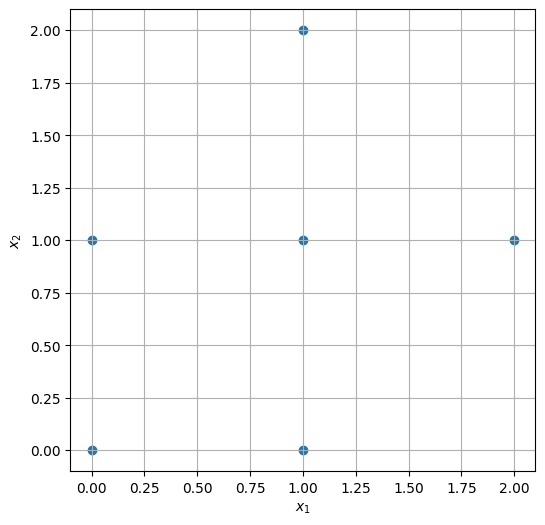

In [1]:
import matplotlib.pyplot as plt

X = [[1, 1], [1, 2], [2, 1], [0, 0], [1, 0], [0, 1]]
y = [1, 1, 1, -1, -1, -1]

x_coords = [point[0] for point in X]
y_coords = [point[1] for point in X]

# Create plot
plt.figure(figsize=(6, 6))
plt.scatter(x_coords, y_coords)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid(True)
plt.show()

## (b -- 10 + 10 pts) 

Using the support vectors, find the equation for the maximum margin separating plane, and determine the geometric margin. (Assume a simple linear SVM and no soft-margin). 

In [2]:
from IPython.display import Image
# Replace the figure name
# Image(filename='sample.png') 

# Question 3. (Binary Image Classification, 30 pts + bonus pts)

In this question, you will perform a binary image classification task with scikit-learn implemented models. Your will see the importance of a powerful feature extractor. Meanwhile, you will learn to perform hyper-parameter tunning and select machine learning models with scikit-learn. Please **do not** use deep learning models for training use in this question.

#### Import/Install required packages

In [16]:
# Import libraries
import os
from os.path import join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from PIL import Image
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#### Data preprocessing

In [17]:
# A help function which appends the path list for train and test image folder
def get_path(is_train=True):
    if is_train:
        directory = "train"
    else:
        directory = "test"

    # Append the image path to a list for imgaes that contain a dog    
    dog_image_dir = f'./cat_vs_dog/{directory}/dogs'
    dog_paths = [join(dog_image_dir,filename) for filename in os.listdir(dog_image_dir) if filename.endswith('.jpg')]

    # Append the image path to a list for imgaes that contain a cat   
    cat_image_dir = f'./cat_vs_dog/{directory}/cats'
    cat_paths = [join(cat_image_dir, filename) for filename in os.listdir(cat_image_dir) if filename.endswith('.jpg')]

    img_paths = dog_paths + cat_paths
    
    # Return the unshuffled image paths
    return img_paths

In [18]:
# Show how many figures contained in the train and test dataset
print(f"There are {len(get_path())} train images and {len(get_path(is_train=False))} test images.")

There are 3002 train images and 1000 test images.


Take a look at a few randomly selected example images we will deal with.

[2610, 339, 333, 2206, 1551, 1245, 1525, 1672, 190, 641]


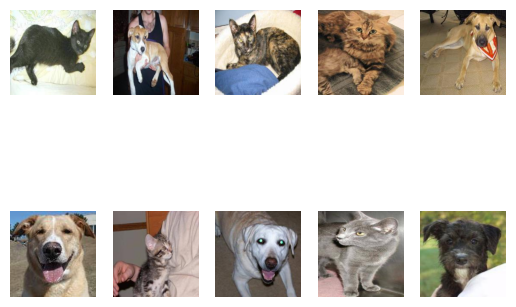

In [21]:
import random 

fig,ax = plt.subplots(2,5)
index_list = [random.randrange(1, len(get_path()), 1) for i in range(10)]
print(index_list)
train_paths = get_path()

filenames=[train_paths[idx] for idx in index_list] 
for i in range(10):
    with open(filenames[i],'rb') as f:
        image=Image.open(f)
        ax[i%2][i//2].imshow(image)
        ax[i%2][i//2].axis('off')
fig.show()

#### Clearly, the above images are of different shape/size.

In [22]:
# See the shape of an image
sample_img = Image.open(train_paths[1])
print(np.array(sample_img).shape)

(200, 200, 3)


#### Standard PCA methods implemented in Scikit-learn do not work for color imgaes (RGB), so we will transform the images into grayscale.

In [23]:
import matplotlib

# Transform color images to grayscale
def rgb2gray(rgb_img):
    return np.dot(rgb_img[...,:3], [0.2989, 0.5870, 0.1140])

# Given the image path, return the resized image as an numpy 2d array
def get_image(path):
    img = Image.open(path)
    img = img.resize((200,200))
    img.save(path)
    img = matplotlib.image.imread(path)
    gray = rgb2gray(img)  
    return np.array(gray)

In [24]:
print(get_image(train_paths[1]).shape)

(200, 200)


#### Append image data and labels in to list

In [25]:
# Prepare the raw data: grayscale, train images and train labels
h, w = get_image(train_paths[1]).shape
train_data = np.empty((len(train_paths), h, w))
train_label = [1] * int(len(train_paths)/2) + [0] * int(len(train_paths)/2)
count = -1
for pth in train_paths:
    count += 1
    image = get_image(pth)
    train_data[count] = image
n_samples = train_data.shape[0]
X = np.empty((n_samples, h * w))
for i in range(n_samples):
    X[i] = train_data[i].flatten()
y = train_label
print(f"The shape of the training data is {X.shape}")

The shape of the training data is (3002, 40000)


#### Prepare the raw test data

In [26]:
test_paths = get_path(is_train=False)


# Prepare the raw dataframe: grayscale, test images and test labels
test_data = np.empty((len(test_paths), h, w))
test_label = [1] * int(len(test_paths)/2) + [0] * int(len(test_paths)/2)
count = -1
for pth in test_paths:
    count += 1
    image = get_image(pth)
    test_data[count] = image
n_samples = test_data.shape[0]
X_test = np.empty((n_samples, h * w))
for i in range(n_samples):
    X_test[i] = test_data[i].flatten()
y_test = test_label
print(f"The shape of the test data is {X_test.shape}")

The shape of the test data is (1000, 40000)


#### Shuffle the training dataset

In [27]:
# Shuffle the training dataset
from sklearn.utils import shuffle
X_train, y_train = shuffle(X, y, random_state=0)
X_train
print(f"The shape of the training data is {X.shape}")

The shape of the training data is (3002, 40000)


In [28]:
# Import additional libaries
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

## Question 3.1 Reducing the dimensions (feature extraction using PCA)



Directly training on current training dataset may consume a large amount of time. One wise choice is to firstly perform feature extraction so that we do not have to train model with non-necessary features.

### 3.1.1 SVM on extracted features (15pts)

In [29]:
# The list of number of components for PCA
n_list = [10, 20, 50, 100, 150, 200, 498]
for i in range(len(n_list)):
    n_components = n_list[i]
    print(f"############ Number of components is {n_components} ############")

    #
    # your code here for PCA
    pca = PCA(n_components=n_components)
    #
    print("Projecting the input data on the eigenimages orthonormal basis")
    X_train_pca = pca.transform(X_train)
    print(X_train_pca.shape)
    X_test_pca = pca.transform(X_test)

    #
    # your code here for training SVM classifier and prediction on X_test (y_pred are predicted labels in line below)
    #

    print(f"Confusin matrix: {confusion_matrix(y_test, y_pred, labels=range(2))}")

    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

############ Number of components is 10 ############
Projecting the input data on the eigenimages orthonormal basis


NotFittedError: This PCA instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### 3.1.2 Logistic regression on extracted features (15pts)

In [ ]:
# The list of number of components for PCA
n_list = [10, 20, 50, 100, 150, 200, 498]
for i in range(len(n_list)):
    n_components = n_list[i]
    print(f"############ Number of components is {n_components} ############")

    #
    # your code here for PCA
    #
    print("Projecting the input data on the eigenimages orthonormal basis")
    X_train_pca = pca.transform(X_train)
    print(X_train_pca.shape)
    X_test_pca = pca.transform(X_test)

    #
    # your code here for training Logistic Regression classifier and prediction on X_test (y_pred are predicted labels in line below)
    #

    print(f"Confusin matrix: {confusion_matrix(y_test, y_pred, labels=range(2))}")

    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

**Leaderboard Depending on your best achieved accuracy score, the remaining points and bonus points are organized as below:**

Accuracy score > 55%: 30 pts

Accuracy score 50-55%: 15 pts

Accuracy score < 50%: 5 pts

# Question 4. (Coding assignment: Linear Regression, 10 pts)



In this question, you'll be coding up linear regression algorithm from scratch. 

### Instructions
- Download the datasets `heights_weights.csv`. **Place these files in the same directory as this notebook.**
- You are **NOT** allowed to use machine learning libraries such as `scikit-learn` to build the models for this question.
- You are required to complete the functions defined in the code blocks following each question. Fill out sections of the code marked `"YOUR CODE HERE"`.
- You're free to add any number of methods within each class.
- You may also add any number of additional code blocks that you deem necessary. 
- If not comfortable with Python, you can code in Matlab. Make sure to add the files in the submission zip folder.
-  You may use `scikit-learn` package **only** to compare your final error.

In [ ]:
# Importing Libraries
import time
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Data Preparation.
To keep things simple, first we'll use a toy dataset to test our implementation. This dataset contains the heights and weights of a few individuals. Our goal is to predict the weight of an individual given their height using a linear regression model.

In [ ]:
df = pd.read_csv('./heights_weights.csv')

In [ ]:
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


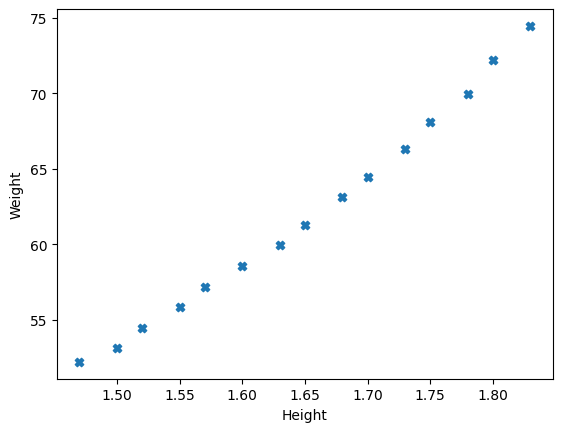

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['Height'], df['Weight'], marker='X')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

Looking at the distribution of the data, it seems like `Weight` and `Height` have a linear relationship. Hence, a linear regression model should be able to capture this relationship.  

Let's us convert the dataframe `df` to a Numpy array so that it is easier to perform operations on it.

In [ ]:
X_train = np.array(df['Height'])
print(X_train.size)
y_train = np.array(df['Weight'])
X_train = np.expand_dims(X_train, -1)


print(X_train.shape, y_train.shape)

15
(15, 1) (15,)


### Implement the ` LinearRegression` class
Make sure it works with more than 1 feature.  
**NOTE:** Do **NOT** forget to include a bias term in the weights. 

In [ ]:
class LinearRegression:   
    def __init__(self, lr=0.001, epochs=30):
        """
        Fits a linear regression model on a given dataset.
        
        Args:
            lr: learning rate 
            epochs: number of iterations over the dataset 
        """
        self.lr = lr  
        self.epochs = epochs
        ######################
        #   YOUR CODE HERE   #
        ######################
        # You may add additional fields        

        self.weights = None
        self.bias = None
                
    def train(self, X, y):
        """
        Initialize weights. Iterate through the dataset and update weights once every epoch.
        
        Args:
            X: features
            y: target
        """
        ######################
        #   YOUR CODE HERE   #
        ######################
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for _ in range(self.epochs):
            self.update_weights(X, y)
         
    def update_weights(self, X, y):
        """
        Helper function to calculate the gradients and update weights using batch gradient descent.
        
        Args:
            X: features
            y: target
        """
        ######################
        #   YOUR CODE HERE   #
        ######################
        m = X.shape[0]
        prediction = self.predict(X)
        loss = prediction - y
        
        dw = (X.T @ loss) / m
        self.weights -= self.lr * dw

        db = np.sum(loss) / m
        self.bias -= self.lr * db
     
    def predict(self, X):
        """
        Predict values using the weights.
        
        Args:
            X: features
            
        Returns:
            The predicted value.
        """
        ######################
        #   YOUR CODE HERE   #
        ######################
        return X @ self.weights + self.bias
        

### Build the model and train on the dataset.

In [ ]:
model = LinearRegression(0.01, 100000)
model.train(X_train, y_train)

### (5 points) Implement the evaluation metric `mean squared error`.
We use the [mean squared error (MSE)](https://en.wikipedia.org/wiki/Mean_squared_error) as the metric to evaluate our model.

In [ ]:
def mean_squared_error(y_pred, y_actual):
    """
    Calculates the mean squared error between two vectors.

    Args:
        y_pred: predicted values
        y_actual: actual/true values

    Returns:
        The mean squared error.
    """
    ######################
    #   YOUR CODE HERE   #
    ######################
    return (1 / y_actual.size) * np.sum((y_actual - y_pred) ** 2)
    

### Make predictions using the model and evaluate it.

In [ ]:
y_pred = model.predict(X_train)
print(y_pred)
print("Train MSE: {:.4f}".format(mean_squared_error(y_pred, y_train)))

[51.24803787 53.04752756 54.24718735 56.04667704 57.24633683 59.04582651
 60.8453162  62.04497599 63.84446568 65.04412547 66.84361515 68.04327494
 69.84276463 71.04242442 72.84191411]
Train MSE: 0.5197


### Plot the predicted and the actual values.

In [ ]:
print(X_train.size, y_train.size, y_pred.size)

15 15 15


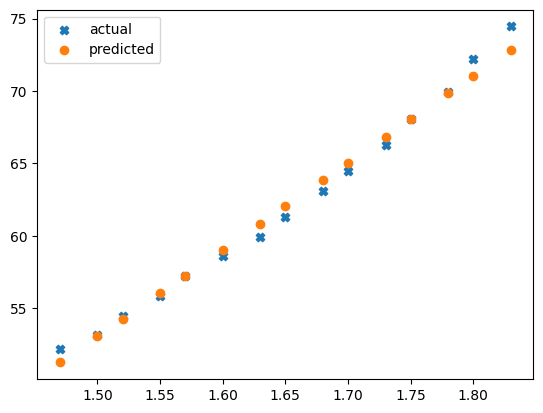

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, marker='X', label='actual')
plt.scatter(X_train, y_pred, marker='o', label='predicted')
plt.legend()
plt.show()